# Matplotlib

### Basic

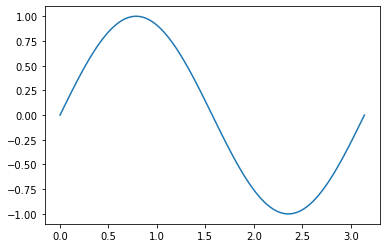

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(start=0, stop=np.pi, num=101)
y = np.sin(2*x)

# plt.figure()
plt.plot(x, y)
plt.show()

### Custom table

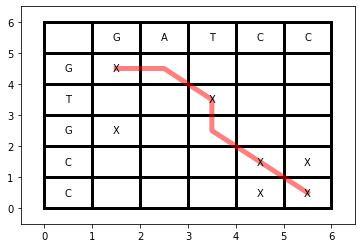

In [2]:
import matplotlib.pylab as plt
import numpy as np

col_labels=['G','A','T','C','C']
row_labels= ['G','T','G','C','C']
table_vals= [
    ['X','','','',''],
    ['','','X','',''],
    ['X','','','',''],
    ['','','','X','X'],
    ['','','','X','X']]
line = np.array([
    [0, 1, 2, 2, 3, 4],
    [0, 0, 1, 2, 3, 4]])
ncol = len(col_labels)
nrow = len(row_labels)

# draw grid lines
plt.plot(np.tile([0, ncol+1], (nrow+2,1)).T, np.tile(np.arange(nrow+2), (2,1)),
    'k', linewidth=3)
plt.plot(np.tile(np.arange(ncol+2), (2,1)), np.tile([0, nrow+1], (ncol+2,1)).T,
    'k', linewidth=3)

# plot labels
for icol, col in enumerate(col_labels):
    plt.text(icol + 1.5, nrow + 0.5, col, ha='center', va='center')
for irow, row in enumerate(row_labels):
    plt.text(0.5, nrow - irow - 0.5, row, ha='center', va='center')

# plot table content
for irow, row in enumerate(table_vals):
    for icol, cell in enumerate(row):
        plt.text(icol + 1.5, nrow - irow - 0.5, cell, ha='center', va='center')

# plot line
plt.plot(line[0] + 1.5, nrow - line[1] - 0.5, 'r', linewidth = 5, alpha = 0.5)

plt.axis([-0.5, ncol + 1.5, -0.5, nrow+1.5])
plt.show()

### Animation

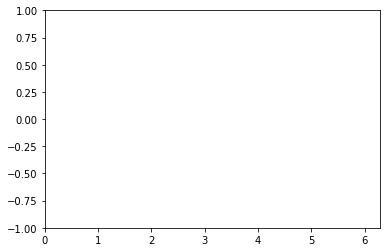

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML # For Jupyter Notebook Only

fig, ax = plt.subplots()


xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

plt.show()
HTML(ani.to_jshtml()) # For Jupyter Notebook Inegration Only

### Image Patch

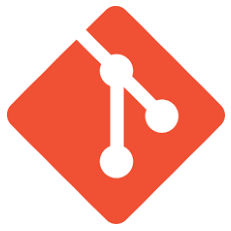

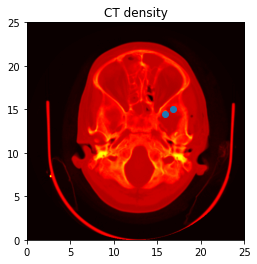

In [4]:
# -----------------------------------------------
# BELOW CODE IS FOR THIS SITE LAYOUT PURPOSE ONLY
# Do not use this in your code 
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
# -----------------------------------------------

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch


image_file = "image.png"
image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis("off")  # clear x-axis and y-axis


# And another image

w, h = 512, 512

with cbook.get_sample_data("ct.raw.gz", asfileobj=True) as datafile:
    s = datafile.read()
A = np.fromstring(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
# pylint: disable=maybe-no-member
im = ax.imshow(A, cmap=plt.cm.hot, origin="upper", extent=extent)
# pylint: enable=maybe-no-member

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, "o")

ax.set_title("CT density")

plt.show()

### 3D

#### Point

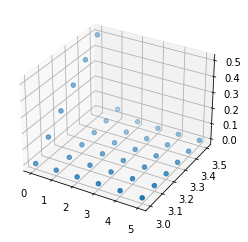

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # pylint: disable=unused-import

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

dt = [0, 1, 2, 3, 4, 5]
Ps = [3, 3.1, 3.2, 3.3, 3.4, 3.5]
Qc = [
    [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    [0, 0.01, 0.02, 0.03, 0.04, 0.05],
    [0, 0.001, 0.002, 0.003, 0.004, 0.005],
    [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    [0, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005],
    [0, 0.000001, 0.000002, 0.000003, 0.000004, 0.000005],
]

x = []
y = []
z = []

for px in range(len(dt)):
    for py in range(len(Ps)):
        x.append(dt[px])
        y.append(Ps[py])
        z.append(Qc[px][py])


ax.scatter(x, y, z)

plt.show()
# ax.set_xlabel("X Label")
# ax.set_ylabel("Y Label")
# ax.set_zlabel("Z Label")

#### Line

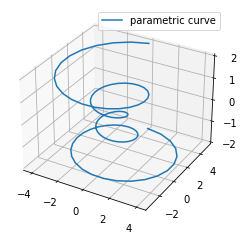

In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams["legend.fontsize"] = 10

fig = plt.figure()
ax = fig.gca(projection="3d")
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z ** 2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label="parametric curve")
ax.legend()

plt.show()

### Shared Label

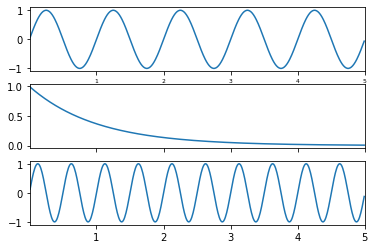

In [7]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

### Qt widgetplt

#### Exemple 1

In [8]:
import sys

# import matplotlib.pyplot as plt
import matplotlib.cm as cm

# E1101:Module 'matplotlib.cm' has no 'rainbow' member

import matplotlib

# import matplotlib.figure
import numpy as np

# DIFF ???? from matplotlib.backends.qt_compat import QtWidgets
from PySide2 import QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
from matplotlib.figure import Figure

from matplotlib.collections import PatchCollection


class WidgetPlt(QtWidgets.QWidget):
    def __init__(self, tool=1):
        super().__init__()
        self.tool = tool
        self.initUi()

    def initUi(self):
        layout = QtWidgets.QVBoxLayout()

        # ----------------------------------------------------------

        self.figure = matplotlib.figure.Figure(figsize=(4, 2))
        self.canvas = FigureCanvas(self.figure)
        # self.canvas = FigureCanvas(Figure(figsize=(4, 2)))
        # ----------------------------------------------------------
        layout.addWidget(self.canvas)
        if self.tool == 1:
            layout.addWidget(NavigationToolbar(self.canvas, self))
        self.setLayout(layout)

    def simpleplot(self, x, y):
        self.canvas.figure.clf()

        self.canvas.figure.subplots().plot(x, y, "-")
        self.canvas.draw()

    def plotpanda(self, df, first_data_label, other_data_label, selectspeed):
        self.canvas.figure.clf()
        ax = self.canvas.figure.subplots()
        # pylint: disable=maybe-no-member
        colors = iter(cm.rainbow(np.linspace(0, 1, len(df.columns))))
        # pylint: enable=maybe-no-member
        for i in range(1, len(df.columns)):
            ax.plot(df.iloc[:, 0], df.iloc[:, i], "o-", color=next(colors))

        ax.legend()
        ax.set_xlabel(first_data_label)
        ax.set_ylabel(other_data_label)
        ax.set_title(selectspeed)

        self.canvas.draw()

    def plotpatchcollection(self, mypatches, mycolors=[], mylw=[]):
        self.canvas.figure.clf()
        ax = self.canvas.figure.subplots()

        p = PatchCollection(mypatches)  # , alpha=0.4)
        p.set_facecolor(tuple(mycolors))
        p.set_linewidth(mylw)

        ax.add_collection(p)
        ax.autoscale(enable=True, axis="both", tight=None)

        self.canvas.draw()

    def plotimage(self, image, marker=[]):
        self.canvas.figure.clf()
        ax = self.canvas.figure.subplots()

        if marker != []:
            markers = marker
            x, y = zip(*markers)
            ax.plot(x, y, "o", color="red")

        ax.imshow(image)
        ax.axis("off")

        self.canvas.draw()


if __name__ == "__main__":
    pass

    # import numpy as np

    # x = np.linspace(start=0, stop=np.pi, num=101)
    # y = np.sin(2 * x)
    # qapp = QtWidgets.QApplication(sys.argv)
    # app = WidgetPlt()
    # app.simpleplot(x, y)
    # app.show()
    # qapp.exec_()

In [9]:
import sys
import time

import numpy as np


import matplotlib
matplotlib.use("Qt5Agg")
from matplotlib.backends.qt_compat import QtCore, QtWidgets, is_pyqt5
from matplotlib.backends.backend_qt5agg import (
        FigureCanvas, NavigationToolbar2QT as NavigationToolbar)

from matplotlib.figure import Figure


class ApplicationWindow(QtWidgets.QMainWindow):
    def __init__(self):
        super(ApplicationWindow, self).__init__()
        self._main = QtWidgets.QWidget()
        self.setCentralWidget(self._main)
        layout = QtWidgets.QVBoxLayout(self._main)

        static_canvas = FigureCanvas(Figure(figsize=(5, 3)))
        layout.addWidget(static_canvas)
        self.addToolBar(NavigationToolbar(static_canvas, self))

        dynamic_canvas = FigureCanvas(Figure(figsize=(5, 3)))
        layout.addWidget(dynamic_canvas)
        self.addToolBar(QtCore.Qt.BottomToolBarArea,
                        NavigationToolbar(dynamic_canvas, self))

        self._static_ax = static_canvas.figure.subplots()
        t = np.linspace(0, 10, 501)
        self._static_ax.plot(t, np.tan(t), ".")

        self._dynamic_ax = dynamic_canvas.figure.subplots()
        self._timer = dynamic_canvas.new_timer(
            100, [(self._update_canvas, (), {})])
        self._timer.start()

    def _update_canvas(self):
        self._dynamic_ax.clear()
        t = np.linspace(0, 10, 101)
        # Shift the sinusoid as a function of time.
        self._dynamic_ax.plot(t, np.sin(t + time.time()))
        self._dynamic_ax.figure.canvas.draw()


if __name__ == "__main__":
    pass
    # qapp = QtWidgets.QApplication(sys.argv)
    # app = ApplicationWindow()
    # app.show()
    # qapp.exec_()

### Tkinter

In [10]:
import tkinter as tk

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


class WidgetPlt(tk.Tk):
    def __init__(self, fig):
        super().__init__()

        self.title("Embedding in Tk")
        self.fig = fig

        canvas = FigureCanvasTkAgg(self.fig, master=self)  # A tk.DrawingArea.
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        canvas.mpl_connect("key_press_event", self.on_key_press)

        button = tk.Button(master=self, text="Quit", command=self._quit)
        button.pack(side=tk.BOTTOM)

    def on_key_press(self, event):
        print("you pressed {}".format(event.key))
        key_press_handler(event, self.canvas, self.toolbar)

    def _quit(self):
        self.quit()  # stops mainloop
        self.destroy()  # this is necessary on Windows to prevent
        # Fatal Python Error: PyEval_RestoreThread: NULL tstate


if __name__ == "__main__":
    pass
    # fig = Figure(figsize=(5, 4), dpi=100)
    # t = np.arange(0, 3, 0.01)
    # fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

    # app = WidgetPlt(fig)
    # app.mainloop()
